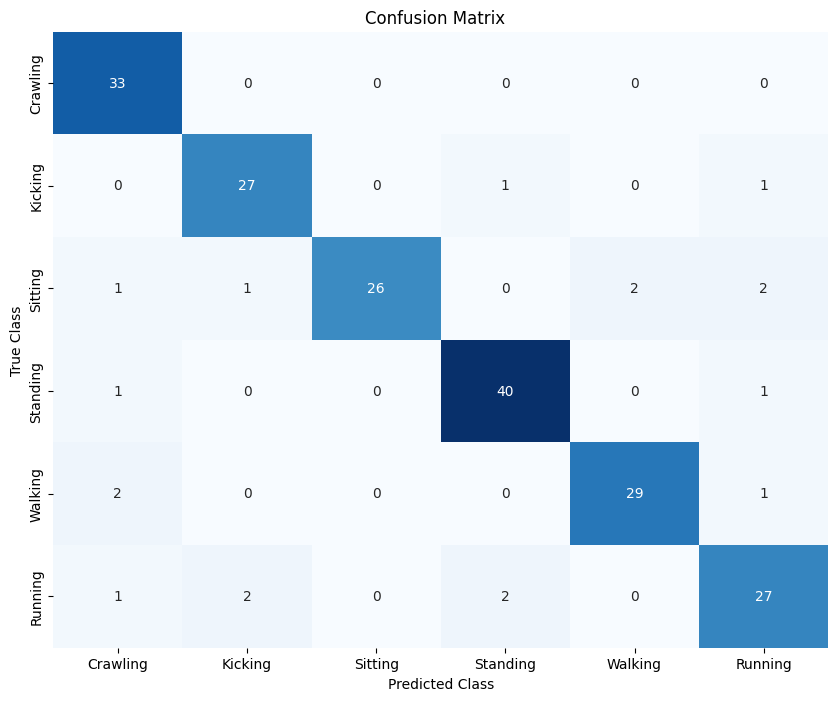

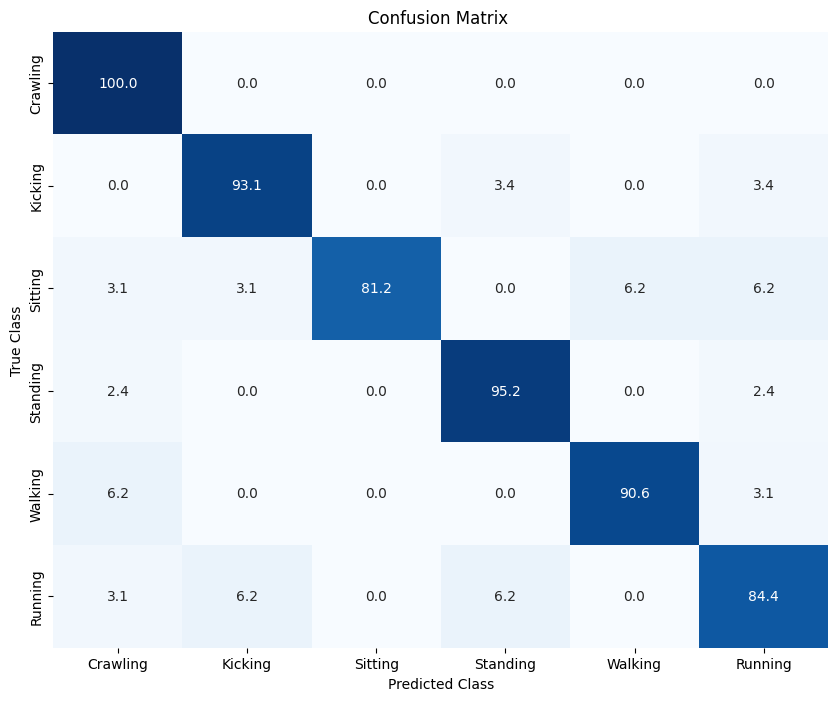

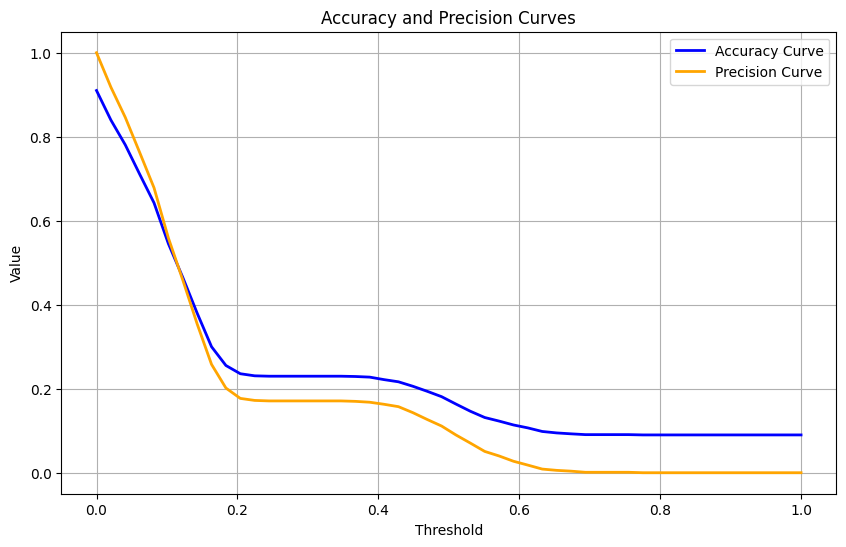

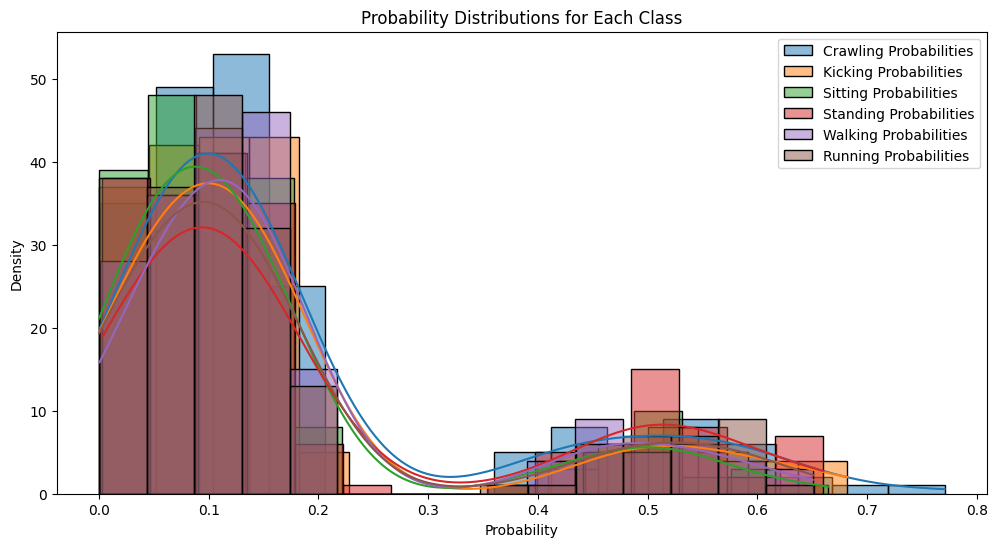

<Figure size 1000x600 with 0 Axes>

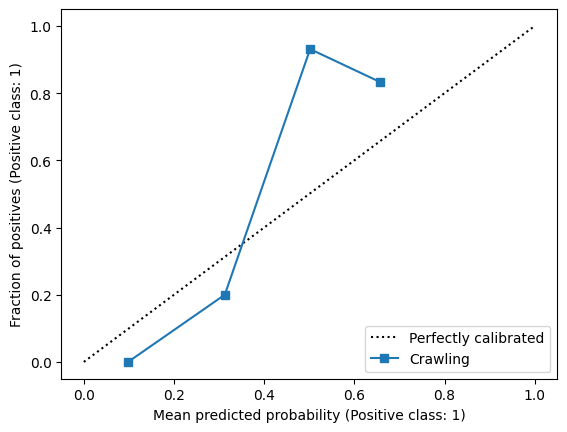

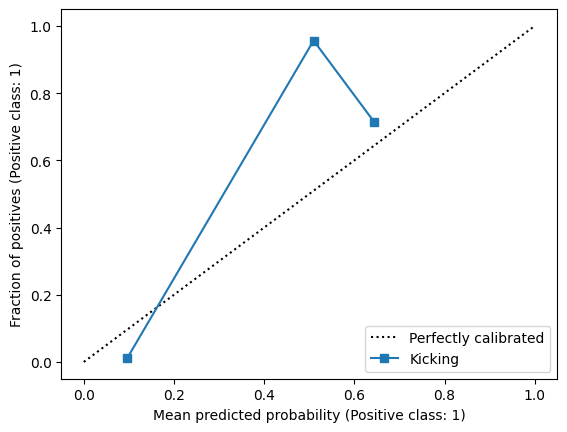

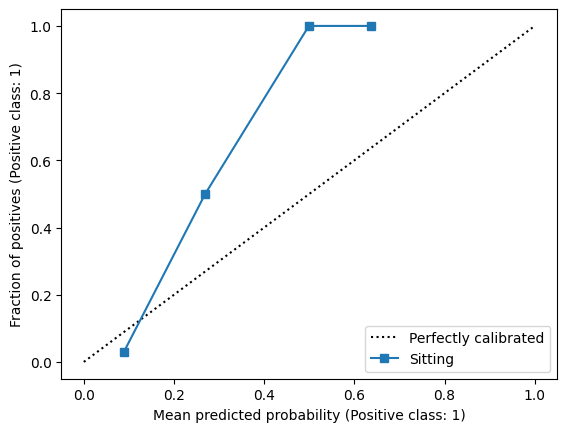

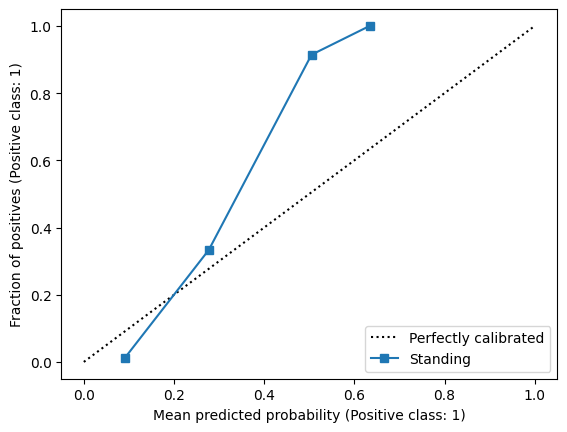

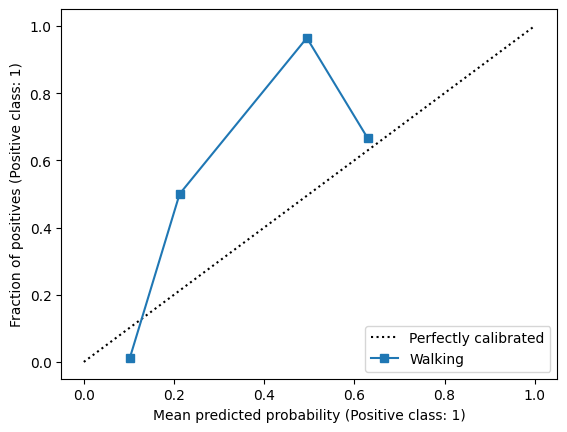

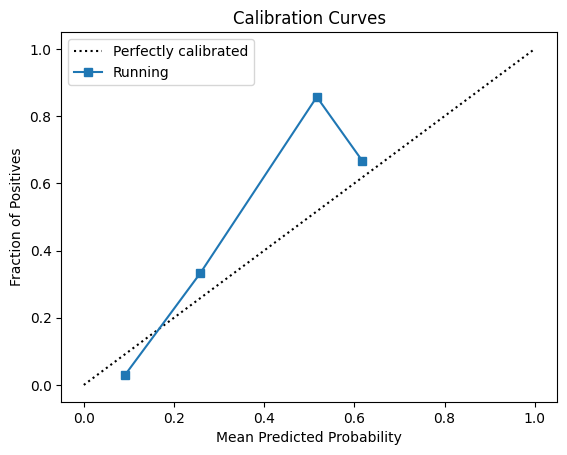

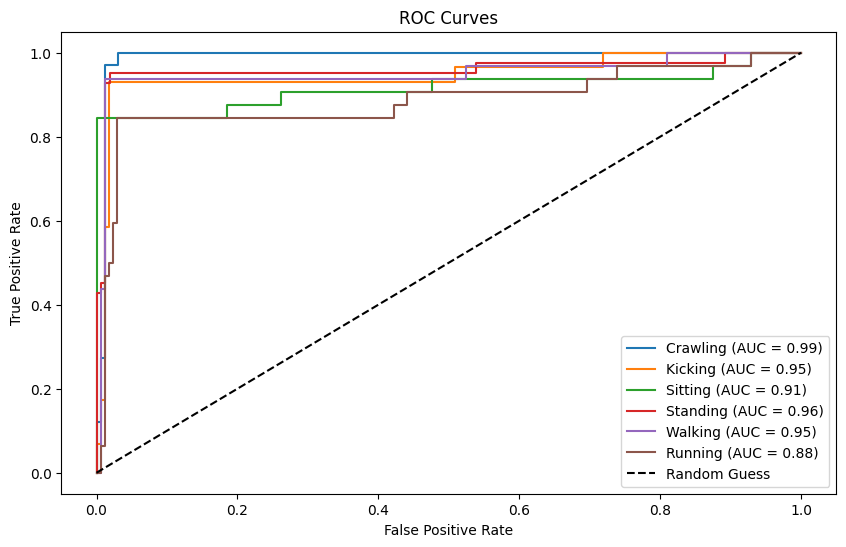

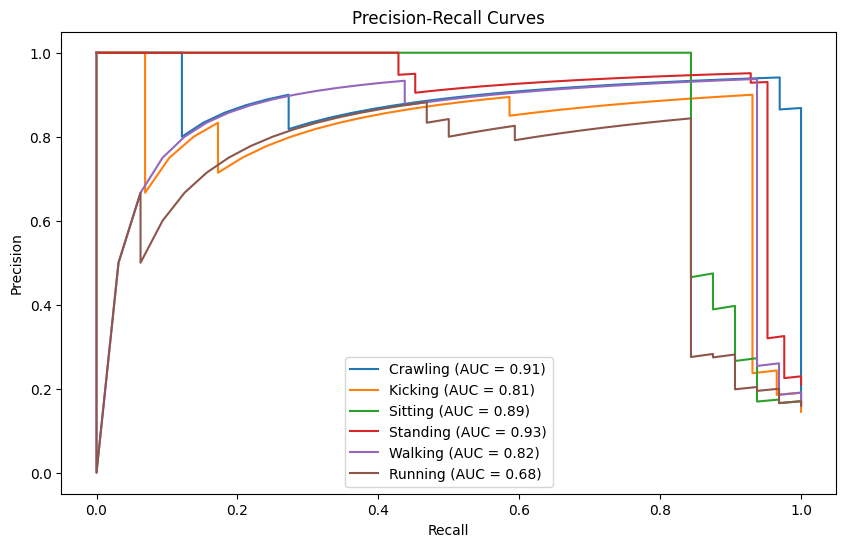

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibrationDisplay

# Step 1: Generate Artificial Data for ~90% Accuracy with Misclassifications for Six Classes
np.random.seed(42)

# Simulating 200 samples, 6 classes
num_samples = 200
classes = ['Crawling', 'Kicking', 'Sitting', 'Standing', 'Walking', 'Running']
num_classes = len(classes)

# Ground truth (random integers for classes)
y_true = np.random.randint(0, num_classes, size=num_samples)

# Predicted probabilities (biased to match ground truth with ~90% accuracy)
y_probs = np.zeros((num_samples, num_classes))
for i, true_label in enumerate(y_true):
    if np.random.rand() < 0.9:  # 90% chance of correct prediction
        y_probs[i, true_label] = np.random.uniform(0.7, 0.9)  # High probability for the correct class
        other_probs = np.random.uniform(0.0, 0.3, size=num_classes - 1)  # Low probabilities for others
        y_probs[i, np.arange(num_classes) != true_label] = other_probs
    else:  # 10% chance of misclassification
        incorrect_label = np.random.choice(np.delete(np.arange(num_classes), true_label))
        y_probs[i, incorrect_label] = np.random.uniform(0.7, 0.9)  # High probability for the wrong class
        other_probs = np.random.uniform(0.0, 0.3, size=num_classes - 1)
        y_probs[i, np.arange(num_classes) != incorrect_label] = other_probs
    y_probs[i] /= y_probs[i].sum()  # Normalize probabilities to sum to 1

# Convert predictions to labels by taking the highest probability
y_pred = np.argmax(y_probs, axis=1)

# Step 2: Enhanced Confusion Matrix with Misclassifications
conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(num_classes))
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100  # Percentages

# Confusion matrix with counts
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes, cbar=False)
plt.title("Confusion Matrix  ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".1f", cmap="Blues", xticklabels=classes, yticklabels=classes, cbar=False)
plt.title("Confusion Matrix ")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Step 3: Accuracy and Precision Curves
# Simulate accuracy and precision across 50 thresholds/iterations
thresholds = np.linspace(0, 1, 50)
accuracies = [np.mean((y_probs[:, np.argmax(y_probs, axis=1)] >= t) == (y_true == y_pred)) for t in thresholds]
precisions = [np.mean(y_probs[:, np.argmax(y_probs, axis=1)][y_true == y_pred] >= t) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label="Accuracy Curve", color="blue", linewidth=2)
plt.plot(thresholds, precisions, label="Precision Curve", color="orange", linewidth=2)
plt.title("Accuracy and Precision Curves")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Step 4: Probability Distributions
plt.figure(figsize=(12, 6))
for cls_idx, cls_name in enumerate(classes):
    sns.histplot(y_probs[:, cls_idx], kde=True, label=f"{cls_name} Probabilities", bins=15)
plt.title("Probability Distributions for Each Class")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

# Step 5: Calibration Curve
plt.figure(figsize=(10, 6))
for cls_idx, cls_name in enumerate(classes):
    CalibrationDisplay.from_predictions((y_true == cls_idx).astype(int), y_probs[:, cls_idx], name=cls_name)
plt.title("Calibration Curves")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()

# Step 6: ROC Curves
plt.figure(figsize=(10, 6))
for cls_idx, cls_name in enumerate(classes):
    fpr, tpr, _ = roc_curve((y_true == cls_idx).astype(int), y_probs[:, cls_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Step 7: Precision-Recall Curves
plt.figure(figsize=(10, 6))
for cls_idx, cls_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve((y_true == cls_idx).astype(int), y_probs[:, cls_idx])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{cls_name} (AUC = {pr_auc:.2f})")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
